# Capstone 3: EDA Notebook – Teledermatology Project
This notebook performs exploratory data analysis on the HAM10000 metadata to identify patterns and relationships that will inform model building and business insights.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Load Cleansed Metadata
We load the cleaned metadata CSV that was saved after the data wrangling step.

In [2]:
metadata = pd.read_csv('cleansed_HAM10000_metadata.csv')
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0


## 3. Class Distribution
Visualizing how many samples exist for each diagnosis label.

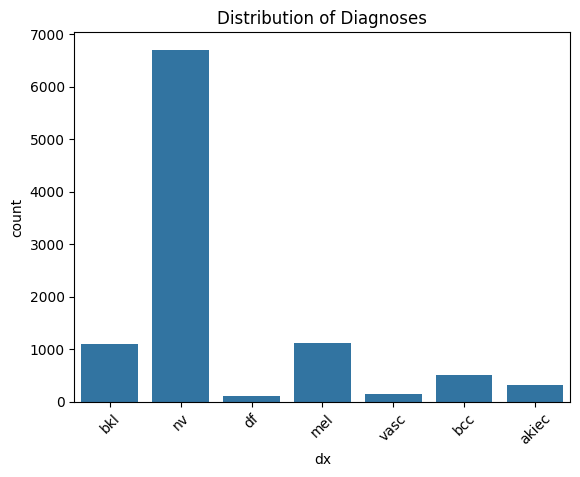

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
dx
nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: proportion, dtype: float64


In [3]:
sns.countplot(x='dx', data=metadata)
plt.title('Distribution of Diagnoses')
plt.xticks(rotation=45)
plt.show()

# Display numeric class distribution
print(metadata['dx'].value_counts())
print(metadata['dx'].value_counts(normalize=True) * 100)

## 4. Age Distribution
Understanding the age spread of patients across the dataset.

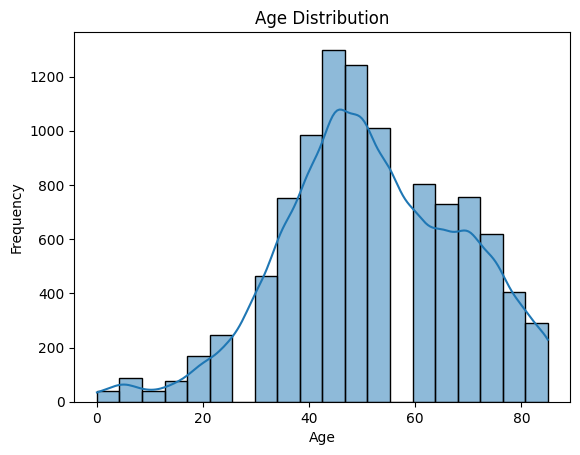

In [4]:
sns.histplot(metadata['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 5. Age by Diagnosis
Analyzing how age varies by skin condition.

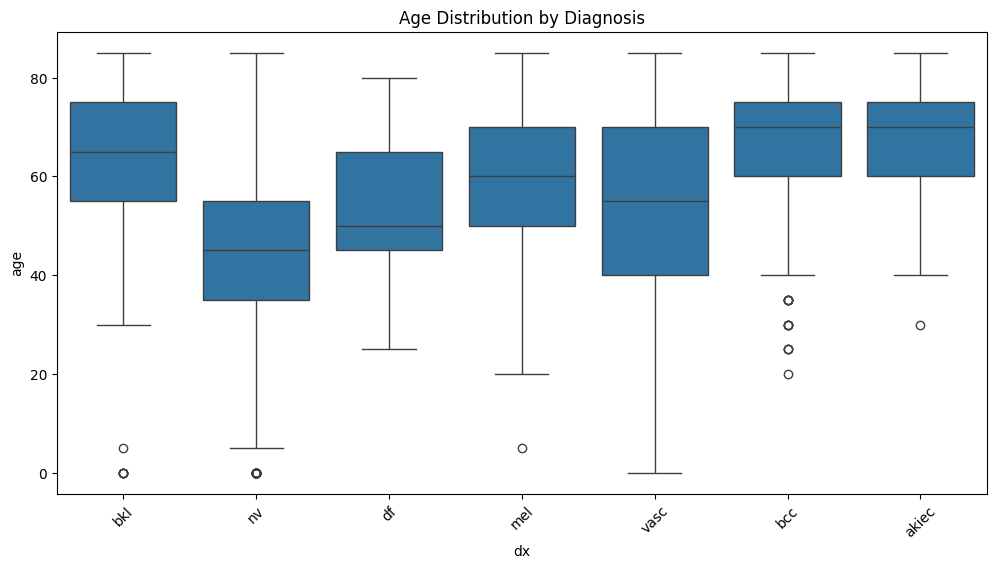

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=metadata, x='dx', y='age')
plt.xticks(rotation=45)
plt.title('Age Distribution by Diagnosis')
plt.show()

## 6. Diagnosis by Gender
Examining the gender distribution across diagnostic categories.

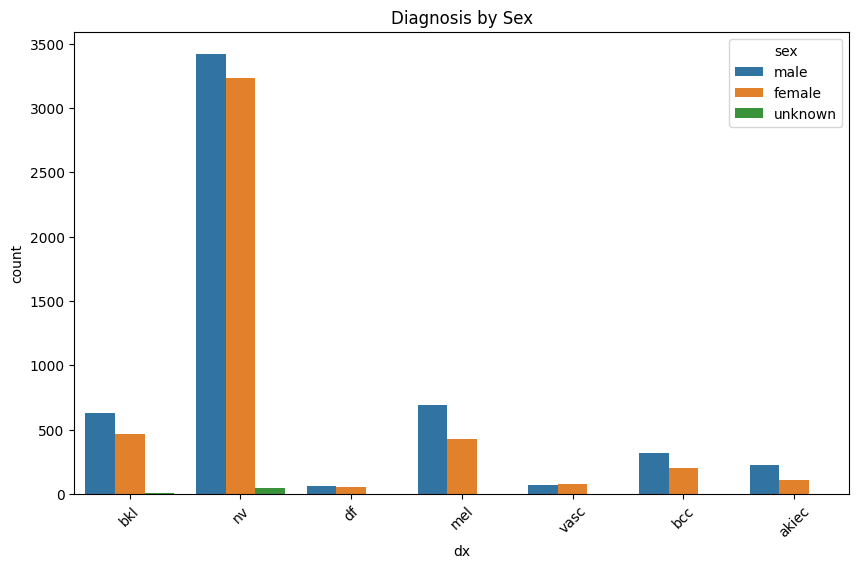

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='dx', hue='sex')
plt.xticks(rotation=45)
plt.title('Diagnosis by Sex')
plt.show()

## 7. Diagnosis by Localization
Understanding where different skin conditions are most likely to appear.

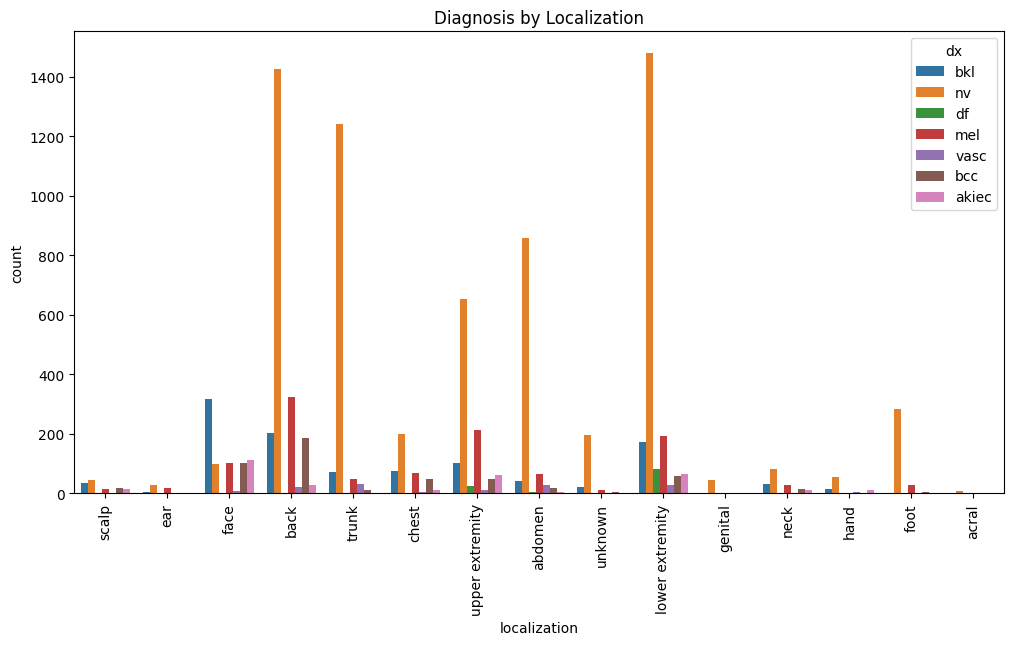

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='localization', hue='dx')
plt.xticks(rotation=90)
plt.title('Diagnosis by Localization')
plt.show()

## 8. Pearson Correlation
Calculating correlation matrix for numeric fields (limited in this case).

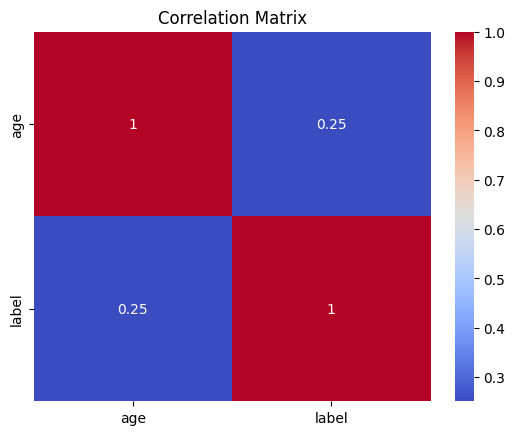

In [8]:
corr = metadata[['age', 'label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##  Business Workflow Diagrams (DFDs)

Understanding the current and enhanced teledermatology workflows is essential for integrating data-driven tools like our ML classifier. Below is a PDF containing two diagrams:

1. **Current Teledermatology Workflow** – where patients submit images and dermatologists manually assess them.
2. **Enhanced Workflow with ML Integration** – where our image classification model assists in triage and speeds up diagnosis.
    
    [Click here to view/download the DFD PDF](file:///Users/manuelramirez/Downloads/Teledermatology_Workflow_DFDs.pdf)


## Use Case

A teledermatology provider uses this dashboard to:
- Filter for high-risk diagnosis types (e.g., melanoma)
- Investigate patient characteristics such as age and lesion location
- Quickly identify patterns that support triage decisions
- Align human review with ML model outputs for efficiency

This use case demonstrates how the dashboard supports early detection and business-critical triage workflows.
Look up tableau file inside the teledermatology project.
